In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
df = pd.read_csv('./Public OD insights - main.tsv', sep = '\t')
df.head()

,tagged_set_id,tagged_set_name,purpose_od,purpose_dc,num_of_images,image_format,labels,horizon,lowest_point_of_hood,highest_point_of_hood,update_gt_date
0,63b538c22426700446cd21b3,official_batch_1_yochen_mfc520_for_train_updated,train,train,257,QUAD,"EUROPE, CLEAR, CLOUDY, DAY",950,1675,1585,"21/08/2023, 17:23:55"
1,63b59fad2426700446ce6d3d,official_batch_2_yochen_mfc520_for_train_updated,train,train,307,QUAD,"EUROPE, CLEAR, CLOUDY, DAY",950,1675,1585,"21/08/2023, 17:23:59"
2,63b5a0092426700446ce6d9c,official_batch_3_yochen_mfc520_for_train_updated,train,train,521,QUAD,"EUROPE, CLEAR, CLOUDY, DAY",950,1675,1585,"21/08/2023, 17:24:03"
3,63b5a0522426700446ce6de7,official_batch_4_yochen_mfc520_for_train_updated,train,train,507,QUAD,"EUROPE, CLEAR, DAY",950,1675,1585,"21/08/2023, 17:24:06"
4,63b5a1132426700446ce6ead,official_batch_5_yochen_mfc520_for_train_updated,train,train,1069,QUAD,"EUROPE, CLEAR, CLOUDY, DAY",950,1675,1585,"21/08/2023, 17:24:10"


In [52]:
df.image_format.unique(),\
df.columns

(array(['QUAD', 'AMBARELLA_3840_1920', '8MP_JPG'], dtype=object),
 Index(['tagged_set_id', 'tagged_set_name', 'purpose_od', 'purpose_dc',
        'num_of_images', 'image_format', 'labels', 'horizon',
        'lowest_point_of_hood', 'highest_point_of_hood', 'update_gt_date'],
       dtype='object'))

In [63]:
df[(df.purpose_od == 'test') & (df.image_format.isin(['8MP_JPG', 'AMBARELLA_3840_1920']))].num_of_images.values.sum()

122367

In [68]:
import glob
import os

folders_8mp = os.listdir("/mnt/data/OD_Data/8mp_data_kernel_1.7mp/")
print (len(folders_8mp))
folders_full = os.listdir("/mnt/data/OD_Data/od_full_training_set_for_data_effort/")
print (len(folders_full))

print (len(df.tagged_set_name.unique()))

imgs = glob.glob("/mnt/data/OD_Data/8mp_data_kernel_1.7mp/*/*/*.png")
print (len(imgs))
imgs = glob.glob("/mnt/data/OD_Data/od_full_training_set_for_data_effort/*/*/*.png")
print (len(imgs))

74
153
605
107042
150201


In [72]:
for folder in folders_full:
    print (df[df.tagged_set_name == folder].image_format.values)

['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
[]
['QUAD']
['QUAD']
['QUAD']
['QUAD']
[]
[]
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
[]
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD']
['QUAD'

In [57]:
df[df.purpose_od == 'train'].num_of_images.values.sum(), \
df[df.purpose_od == 'test'].num_of_images.values.sum()

(311999, 161590)

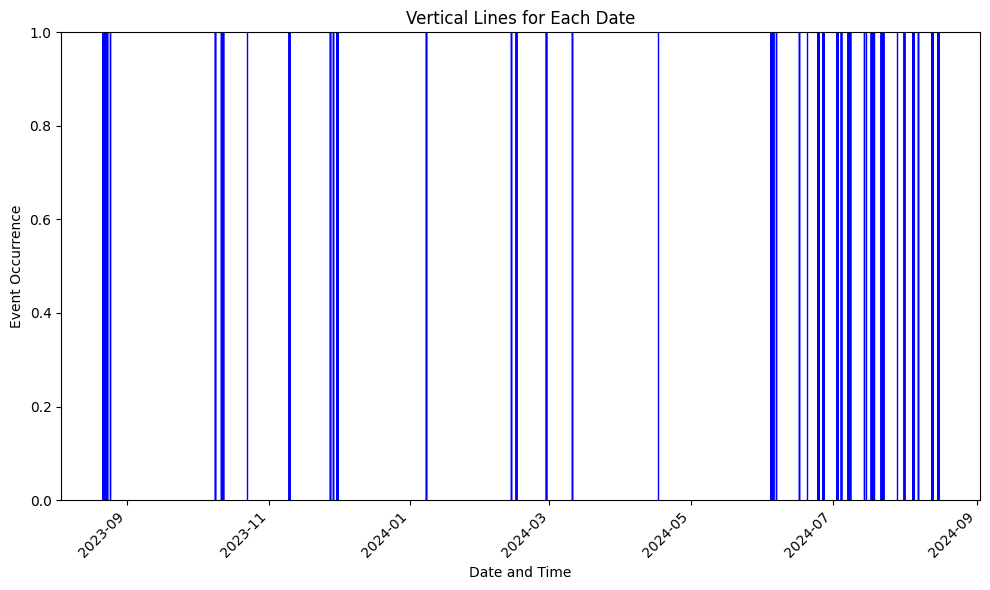

In [64]:


dates = pd.to_datetime(df.update_gt_date.values, format='%d/%m/%Y, %H:%M:%S')

# Plotting
plt.figure(figsize=(10, 6))
plt.vlines(dates, ymin=0, ymax=1, color='blue', linewidth=1)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Vertical Lines for Each Date')
plt.xlabel('Date and Time')
plt.ylabel('Event Occurrence')
plt.tight_layout()
plt.show()

In [67]:
min(dates), max(dates)

(Timestamp('2023-08-21 17:23:55'), Timestamp('2024-08-15 10:04:54'))

In [78]:
gt = pd.read_csv("/home/b2b/arthur/data/100_hard_images/gt.tsv", sep = '\t')

In [79]:
gt

,Unnamed: 0,name,x_center,y_center,width,height,label,is_occluded,is_truncated,d3_separation,r_label,is_rider_on_2_wheels,occlusion_state_b2b,is_on_road_bondery,l_label,importance_state,ignore_state
0,71,ab_car_munich_urban_day_021_001206.png,2901.395958,922.308411,101.208085,57.616822,VAN,1,0,2897.684632,SIDE,0,1,0,BACK,0,0
1,72,ab_car_munich_urban_day_021_001206.png,2743.140252,975.000000,50.280503,198.500000,PEDESTRIAN_MCP,0,0,0.000000,NaN,0,0,0,NaN,0,0
2,73,ab_car_munich_urban_day_021_001206.png,2588.274780,981.774808,75.450439,250.450385,PEDESTRIAN_MCP,0,0,0.000000,NaN,0,0,0,NaN,0,0
3,74,ab_car_munich_urban_day_021_001206.png,2048.000000,387.500000,56.000000,135.500000,IGNORE_TRAFFIC_LIGHT,0,0,0.000000,NaN,0,0,0,NaN,0,0
4,75,ab_car_munich_urban_day_021_001206.png,2584.000000,731.500000,44.000000,109.000000,IGNORE_TRAFFIC_LIGHT,0,0,0.000000,NaN,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,27384,1686585823000227.png,3398.351888,1252.000000,872.703776,586.000000,CAR,0,1,0.000000,NaN,0,1,0,NaN,0,0
2907,27385,1686585823000227.png,1797.333252,1255.333252,146.666630,117.333374,CAR_CIPV,0,0,0.000000,NaN,0,0,0,NaN,0,0
2908,27386,1686585823000227.png,2195.367948,1245.824760,373.264105,296.350481,CAR_NLV,0,0,0.000000,NaN,0,0,0,NaN,0,0
2909,27387,1686585823000227.png,1805.795021,1187.038400,10.534476,11.283635,CAR,0,0,0.000000,NaN,0,2,0,NaN,0,1
